# Modelo de ML para el KPI1
Para este modelo se va a utilizar Knn, donde se va a clacificar los vehiculos por medio de la eficiencia energetiuca, con las variables CO2, millas  por galon, costo de combustible.

In [29]:
# Bibliotecas que vamos a importar 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import joblib

In [2]:
# Traemos los datos y los dejamos en un dataframe
df_convencional = pd.read_parquet('../Data/df_vfed.parquet')

In [3]:
# Revición de datos a nivel global
df_convencional.head(2)

,Year,Manufacturer,Model,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Fuel,Category,Alternative Fuel
0,2017,BMW,M6 Coupe,15.0,519.0,3850.0,0.0,Premium Gasoline,Subcompact Cars,No
1,2017,BMW,X3 sDrive28i,21.0,374.0,2700.0,0.0,Premium Gasoline,Small Sport Utility Vehicle 2WD,No


In [4]:
# Filtramos los datos desde los años con los que contamos datos de CO2
df_convencional_N = df_convencional[df_convencional['Year'] > 2010]

In [5]:
df_convencional_N.describe()
# Encontramos valores en CO2 menores a 0 

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA
count,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000
mean,2017.247840,22.802765,341.454147,2709.750679,194.701925
std,3.702881,15.876439,177.057767,853.726864,772.514826
min,2011.000000,8.000000,-1.000000,500.000000,0.000000
25%,2014.000000,16.000000,293.000000,2200.000000,0.000000
50%,2017.000000,20.000000,375.000000,2650.000000,0.000000
75%,2020.000000,23.000000,454.000000,3250.000000,0.000000
max,2024.000000,153.000000,979.000000,7250.000000,4600.000000


In [6]:
df_convencional_N.loc[df_convencional_N['CO2 (p/mile)'] < 0, 'CO2 (p/mile)'] = 0

# EDA para comprender mejor los datos 

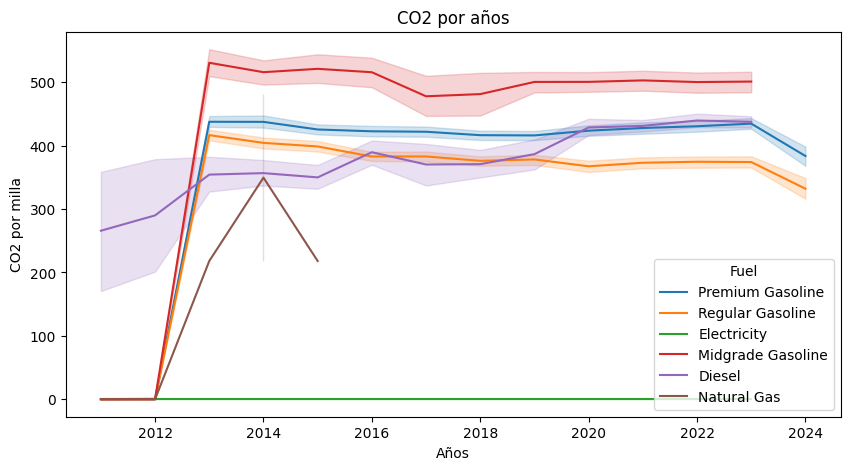

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='CO2 (p/mile)', hue='Fuel', data=df_convencional_N)
plt.xlabel('Años')
plt.ylabel('CO2 por milla')
plt.title('CO2 por años')
plt.show()

En el gráfico anterior podemos ver la cantidad de CO2 por milla, producido por los diferentes tipos de energía, podemos ver que los vehículos con Midgrade gasoline produce más CO2 por milla.

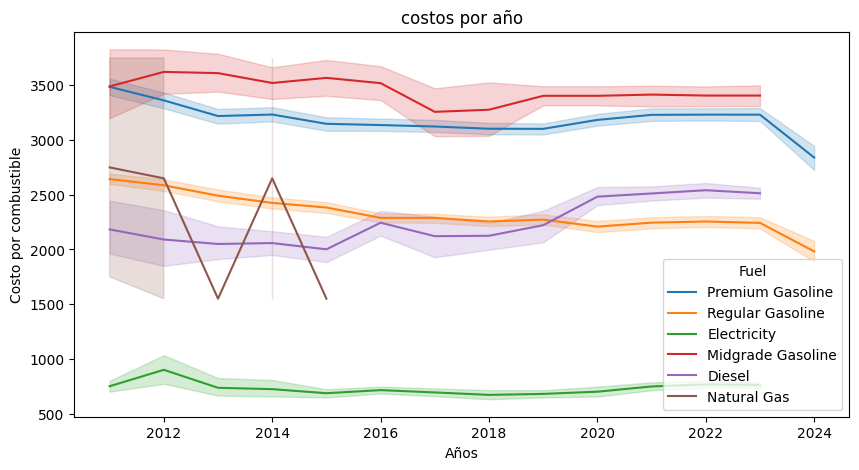

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='FuelCost', hue='Fuel', data=df_convencional_N)
plt.xlabel('Años')
plt.ylabel('Costo por combustible')
plt.title('costos por año')
plt.show()

En el grafico anterior podemos concluir que los vehículos con Midgrade Gasoline es uno de los combustibles mas costosos, mientras los electricos su combustible es mucho mas economico.

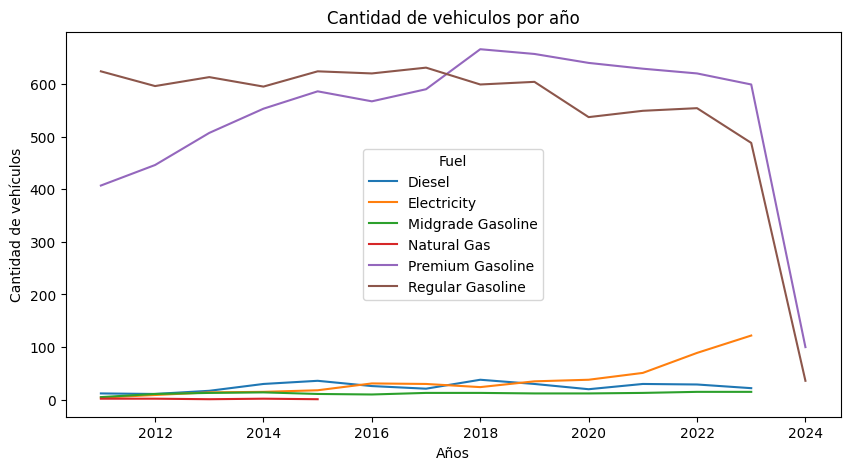

In [9]:
df_convencional_gg = df_convencional_N.groupby(['Year', 'Fuel']).size().reset_index(name='Cantidad')
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Cantidad', hue='Fuel', data=df_convencional_gg)
plt.xlabel('Años')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehiculos por año')
plt.show()

Gráfico donde podemos ver que los vehículos más comprados son los de energias como Regular gasoline y Premium gasoline, ademas hay una tendencia de vehículos electricos en los ultimos años 

# Implementación de ML

In [10]:
df_convencional_N.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA
count,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000
mean,2017.247840,22.802765,341.583374,2709.750679,194.701925
std,3.702881,15.876439,176.807949,853.726864,772.514826
min,2011.000000,8.000000,0.000000,500.000000,0.000000
25%,2014.000000,16.000000,293.000000,2200.000000,0.000000
50%,2017.000000,20.000000,375.000000,2650.000000,0.000000
75%,2020.000000,23.000000,454.000000,3250.000000,0.000000
max,2024.000000,153.000000,979.000000,7250.000000,4600.000000


In [11]:
# Creamos una etiqueta de eficiencia 
df_convencional_N['Eficiencia'] = (df_convencional_N['Miles per gallon (mpg)'] / df_convencional_N['FuelCost']) - df_convencional_N['CO2 (p/mile)']
# Calculamos a eficiencia por medio de mas millas por galon, menos costo de combustible y menos CO2 por milla

In [12]:
df_convencional_N.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Eficiencia
count,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000
mean,2017.247840,22.802765,341.583374,2709.750679,194.701925,-341.570455
std,3.702881,15.876439,176.807949,853.726864,772.514826,176.818112
min,2011.000000,8.000000,0.000000,500.000000,0.000000,-978.998897
25%,2014.000000,16.000000,293.000000,2200.000000,0.000000,-453.994062
50%,2017.000000,20.000000,375.000000,2650.000000,0.000000,-374.992037
75%,2020.000000,23.000000,454.000000,3250.000000,0.000000,-292.983429
max,2024.000000,153.000000,979.000000,7250.000000,4600.000000,0.306000


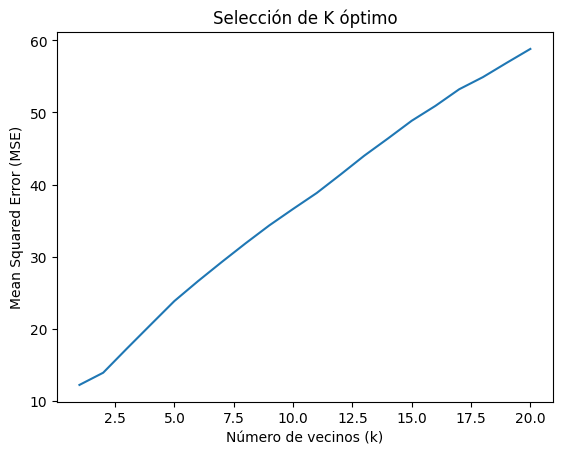

In [13]:
# Definimos los datos de x y Y
X = df_convencional_N[['Year', 'Miles per gallon (mpg)', 'CO2 (p/mile)', 'FuelCost']]
y = df_convencional_N['Eficiencia']

# Estandarizamos las caracteristicas 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Probamos diferentes valores de k
k_values = range(1,21)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(-scores.mean())

# Grafica para escoger el mejor k
plt.plot(k_values, mse_scores)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Selección de K óptimo')
plt.show()

En el anterior grafico podemos decir que el valor de k mas indicado es 5 k

In [28]:
# Seleccionamos el valor se k optimo 
k_optimo = 6

# Entrenamos el modelo Knn con el k optimo 
knn = KNeighborsRegressor(n_neighbors=k_optimo)
knn.fit(X_scaled, y)

# Predecir los mismos datos para evaluar 
y_pred = knn.predict(X_scaled)

# Evaluar el modelo 
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 13.51191120495158
R² Score: 0.9995677947029828


In [30]:
# Guardar el modelo en un archivo 
joblib.dump(knn, 'Modelo_ML1.joblib')

['Modelo_ML1.joblib']